## Implementation Of Classification ML

In [1]:
file = r''
target = ''

In [2]:
# Parameters
file = "Breast cancer.csv"
target = "info"


In [3]:
import dabl
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(rf'{file}')


E:\MIT\OncoOmics_portal\ML\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


### Automated Cleaning

In [4]:
df_clean = dabl.clean(df)[::10]
df_clean

,gene,transcript,score,pvalue,qvalue,info
0,CDH1,ENST00000261769,0.021,0.8248,0.9915,oncogene
10,RUNX1,ENST00000300305,0.075,0.2058,0.8136,oncogene
20,SF3B1,ENST00000335508,0.671,0.0000,0.0000,oncogene
30,FANCD2,ENST00000287647,0.048,0.4281,0.9036,oncogene
40,MED23,ENST00000368068,0.087,0.1482,0.7928,oncogene
...,...,...,...,...,...,...
43750,IGHV1-69,ENST00000390633,0.011,0.9995,1.0000,oncogene
43760,KIAA0125,ENST00000429431,0.011,0.9995,1.0000,oncogene
43770,TMEM212,ENST00000334567,0.010,0.9997,1.0000,oncogene
43780,C22orf29,ENST00000405640,0.009,0.9999,1.0000,oncogene


### Types detected in the input csv

In [5]:
types = dabl.detect_types(df_clean)
print(f'Detected types in the csv: {types}')

Detected types in the csv:             continuous  dirty_float  low_card_int  categorical   date  \
gene             False        False         False        False  False   
transcript       False        False         False        False  False   
score             True        False         False        False  False   
pvalue            True        False         False        False  False   
qvalue            True        False         False        False  False   
info             False        False         False         True  False   

            free_string  useless  
gene               True    False  
transcript         True    False  
score             False    False  
pvalue            False    False  
qvalue            False    False  
info              False    False  


### EDA 

Target looks like classification


Linear Discriminant Analysis training set score: 0.548


[[<Figure size 648x648 with 12 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 432x288 with 1 Axes>],
 None]

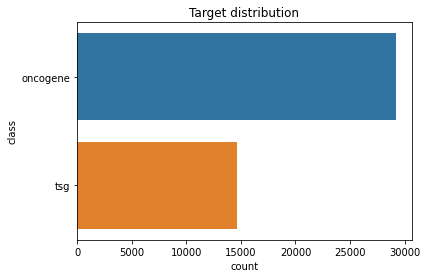

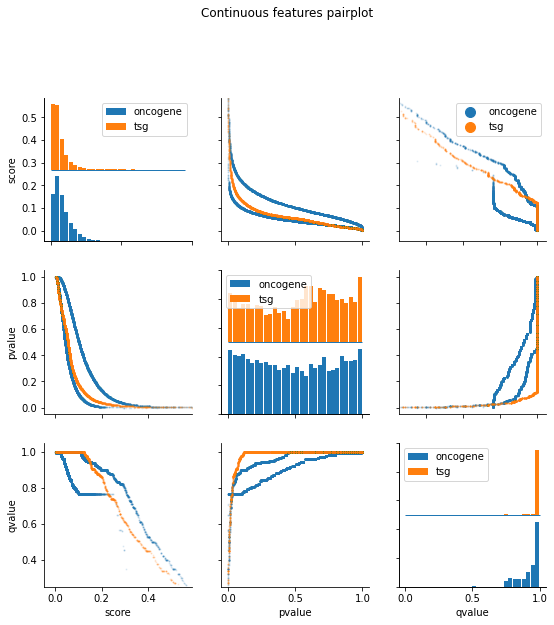

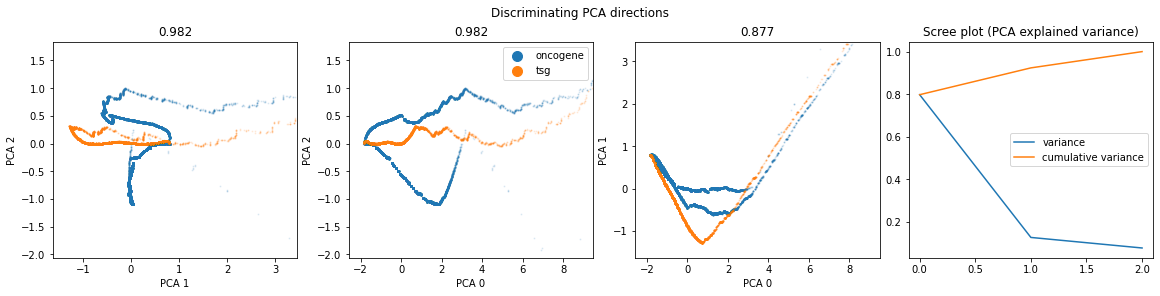

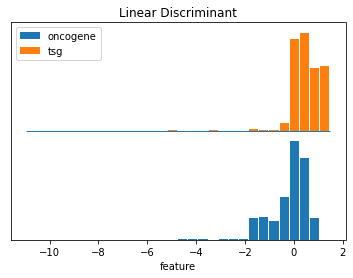

In [6]:
dabl.plot(df, target_col=target)

### Explanation of a simple classifier model which was applied to your data

Running DummyClassifier()
accuracy: 0.667 average_precision: 0.333 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.400
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.667 average_precision: 0.333 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.400



Running GaussianNB()
accuracy: 0.689 average_precision: 0.525 roc_auc: 0.685 recall_macro: 0.547 f1_macro: 0.504
=== new best GaussianNB() (using recall_macro):
accuracy: 0.689 average_precision: 0.525 roc_auc: 0.685 recall_macro: 0.547 f1_macro: 0.504



Running MultinomialNB()
accuracy: 0.667 average_precision: 0.430 roc_auc: 0.601 recall_macro: 0.500 f1_macro: 0.400


Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.778 average_precision: 0.583 roc_auc: 0.804 recall_macro: 0.804 f1_macro: 0.770
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.778 average_precision: 0.583 roc_auc: 0.804 recall_macro: 0.804 f1_macro: 0.770



Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.962 average_precision: 0.988 roc_auc: 0.996 recall_macro: 0.971 f1_macro: 0.959
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=5) (using recall_macro):
accuracy: 0.962 average_precision: 0.988 roc_auc: 0.996 recall_macro: 0.971 f1_macro: 0.959



Running DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 0.969 average_precision: 0.979 roc_auc: 0.994 recall_macro: 0.961 f1_macro: 0.965


Running LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)
accuracy: 0.756 average_precision: 0.806 roc_auc: 0.839 recall_macro: 0.761 f1_macro: 0.741


Running LogisticRegression(class_weight='balanced', max_iter=1000)
accuracy: 0.756 average_precision: 0.806 roc_auc: 0.839 recall_macro: 0.760 f1_macro: 0.741

Best model:
DecisionTreeClassifier(class_weight='balanced', max_depth=5)
Best Scores:
accuracy: 0.962 average_precision: 0.988 roc_auc: 0.996 recall_macro: 0.971 f1_macro: 0.959


Explanation of a simple classifier model applied to your data: 
Depth: 5
Number of leaves: 12


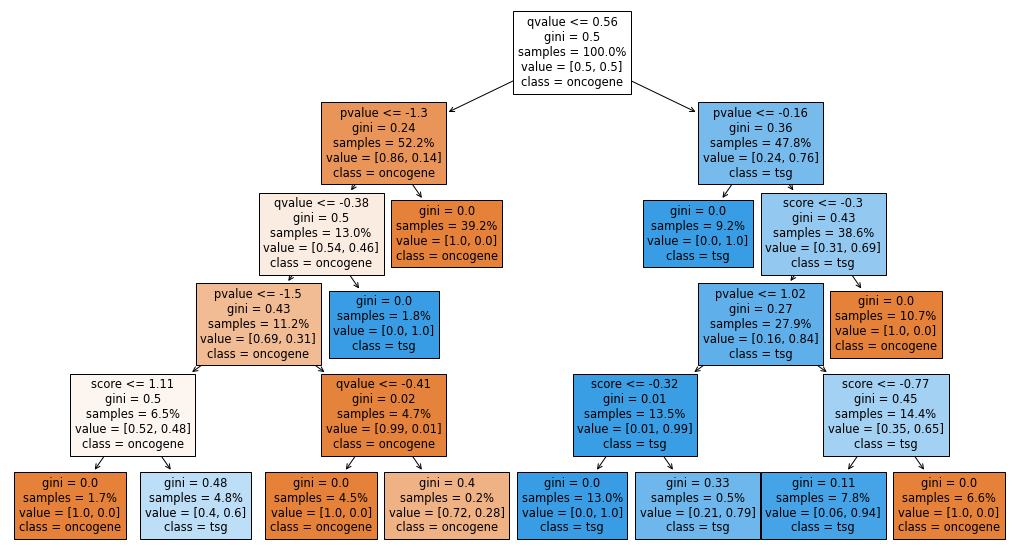

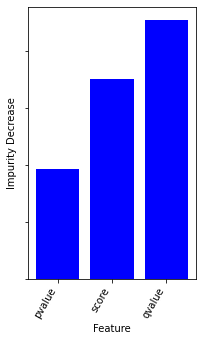

In [7]:
ec = dabl.SimpleClassifier(random_state=0).fit(df, target_col=target)
print('Explanation of a simple classifier model applied to your data: ')
dabl.explain(ec)